In [1]:
import warnings
from time import time
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

# NUMPY SETTINGS
import numpy as np
np.set_printoptions(precision=3, suppress=True)

# MATPLOTLIB Settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
sns.set_context(context='talk',font_scale=0.7)
# sns.set(rc={'figure.figsize': (12, 9.)})
# sns.set_style("whitegrid")

# PANDAS SETTINGS
import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

# LOGGING SETTINGS
import sys
import logging
logging.basicConfig(
    level=logging.INFO, 
    stream=sys.stdout,
    format='%(asctime) s:%(levelname) s:%(message)s '
)
logger = logging.getLogger()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Toy Data

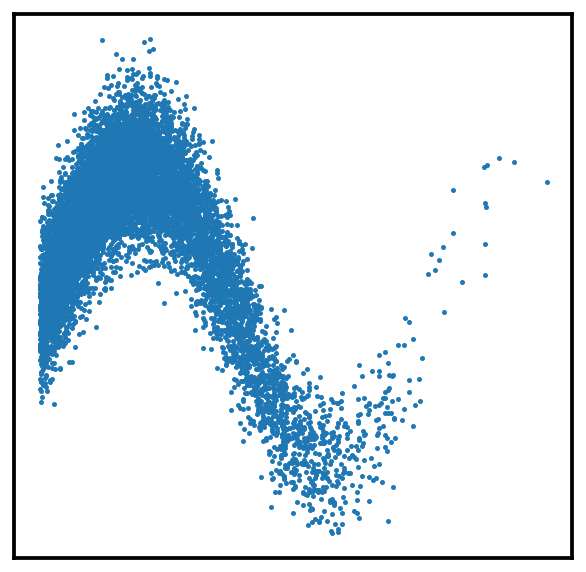

In [2]:
seed = 123
rng = np.random.RandomState(seed=seed)

num_samples = 10000
x = np.abs(2 * rng.randn(1, num_samples))
y = 2 * np.sin(x) + 0.5 * rng.randn(1, num_samples)
data = np.vstack((x, y)).T

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data[:, 0], data[:, 1], s=1)
# ax.set_xlabel('X')
# ax.set_xlim([0, 8])
# ax.set_ylabel('Y')
# ax.set_ylim([-4, 4])
# ax.set_title('Original Data')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)
# ax.set_aspect(aspect='equal')
# plt.savefig(FIG_PATH.joinpath('original.png'), frameon=False)
plt.show()

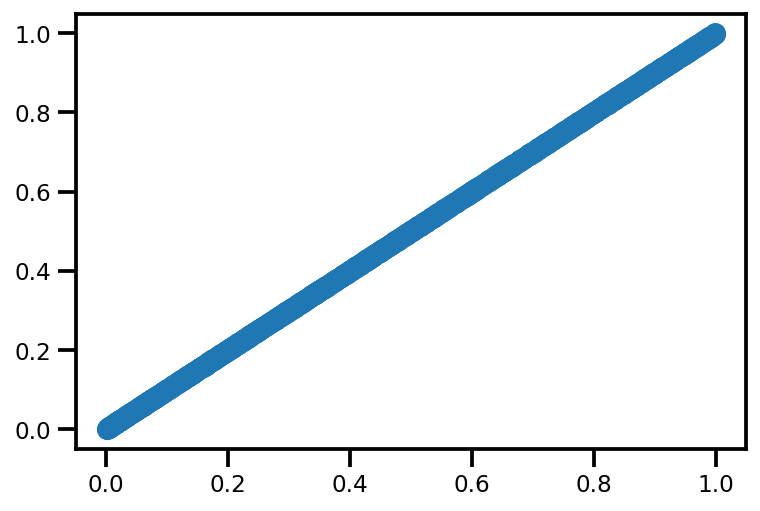

In [7]:


n_samples, n_features = 1000, 2

X = rng.rand(n_samples, n_features)
Y = X + 0.0* rng.randn(n_samples, n_features)

plt.scatter(X.ravel(), Y.ravel())

### Congruence Coefficient


**Resources**

* [Wiki Page](https://en.wikipedia.org/wiki/Congruence_coefficient)
* Abdi, H. (2007). RV Coefficient and Congruence Coefficient. In Neil Salkind (Ed.), Encyclopedia of Measurement and Statistics. Thousand Oaks (CA): Sage. | [Paper](http://wwwpub.utdallas.edu/~herve/Abdi-RV2007-pretty.pdf)
    * Equations 1-3
* Lorenzo-Seva, U. & ten Berge, J.M.F. (2006). Tucker’s Congruence Coefficient as a Meaningful Index of Factor Similarity. Methodology, 2, 57–64.

In [8]:
def congruence_coeff(X, Y):

    covv_xy = np.sum(X * Y)

    return covv_xy / np.linalg.norm(X, ord='fro') / np.linalg.norm(Y, ord='fro')


#### Timings and Tricks

There are a few ways we can solve this:

$$
\sum_{i,j}^N x_{i,j}^2 = \sqrt{\text{tr}\left( X X^\top \right)}
$$

In [9]:
np.testing.assert_almost_equal(np.sqrt(np.sum(X * X)), np.sqrt(np.trace(X @ X.T)))
np.testing.assert_almost_equal(np.sqrt(np.sum(X * X)), np.linalg.norm(X, ord='fro'))

In [12]:
%timeit _ = np.sqrt(np.trace(X @ X.T))
%timeit _ = np.sqrt(np.sum(X * X))
%timeit _ = np.sqrt(np.sum(X ** 2))
%timeit _ = np.linalg.norm(X )

The slowest run took 4.73 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.73 ms per loop
The slowest run took 83.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.85 µs per loop
The slowest run took 52.67 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.23 µs per loop
The slowest run took 11.09 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.93 µs per loop


#### Testing

In [76]:
def test_congruence_coeff_1d():

    seed = 123
    rng = np.random.RandomState(seed)

    n_samples, n_features = 1000, 1

    X = rng.rand(n_samples, n_features)

    np.testing.assert_almost_equal(congruence_coeff(X, X), 1.0)

test_congruence_coeff_1d()

def test_congruence_coeff_nd():

    seed = 123
    rng = np.random.RandomState(seed)

    n_samples, n_features = 1000, 5

    X = rng.rand(n_samples, n_features)

    np.testing.assert_almost_equal(congruence_coeff(X, X), 1.0)

test_congruence_coeff_nd()

### RV Coefficient


**Resources**

* [Wiki Page](https://en.wikipedia.org/wiki/RV_coefficient)
* Abdi, H. (2007). RV Coefficient and Congruence Coefficient. In Neil Salkind (Ed.), Encyclopedia of Measurement and Statistics. Thousand Oaks (CA): Sage. | [Paper](http://wwwpub.utdallas.edu/~herve/Abdi-RV2007-pretty.pdf)
    * Equations 4-7
* Modified Version | [Paper](https://academic.oup.com/bioinformatics/article/25/3/401/244239)
* STATIS Method - [paper](https://personal.utdallas.edu/~herve/Abdi-Statis2007-pretty.pdf)

In [77]:
Kx = np.dot(X, X.T)
Ky = np.dot(Y, Y.T)


covv_xy = np.sum(Kx * Ky)

rv_coeff = covv_xy / np.linalg.norm(Kx, ord='fro') / np.linalg.norm(Ky, ord='fro')

print(f"RV coeff: {rv_coeff:.4f}")

RV coeff: 1.0000


In [83]:
def rv_coeff(X, Y):

    Kx = np.dot(X, X.T)
    Ky = np.dot(Y, Y.T)


    covv_xy = np.sum(Kx * Ky)

    return covv_xy / np.linalg.norm(Kx, ord='fro') / np.linalg.norm(Ky, ord='fro')

#### Timings & Tips

In [81]:
Kx = np.dot(X, X.T)

np.testing.assert_almost_equal(np.sqrt(np.sum(Kx * Kx)), np.sqrt(np.trace(Kx @ Kx.T)))
np.testing.assert_almost_equal(np.sqrt(np.sum(Kx * Kx)), np.linalg.norm(Kx, ord='fro'))

In [82]:
%timeit np.sqrt(np.trace(Kx @ Kx.T))
%timeit np.sqrt(np.sum(Kx * Kx))
%timeit np.linalg.norm(Kx)

10 loops, best of 3: 38.6 ms per loop
100 loops, best of 3: 1.97 ms per loop
1000 loops, best of 3: 329 µs per loop


#### Testing

In [85]:
def test_rv_coeff_1d():

    seed = 123
    rng = np.random.RandomState(seed)

    n_samples, n_features = 1000, 1

    X = rng.rand(n_samples, n_features)

    np.testing.assert_almost_equal(rv_coeff(X, X), 1.0)

test_rv_coeff_1d()

def test_rv_coeff_nd():

    seed = 123
    rng = np.random.RandomState(seed)

    n_samples, n_features = 1000, 5

    X = rng.rand(n_samples, n_features)

    np.testing.assert_almost_equal(rv_coeff(X, X), 1.0)

test_rv_coeff_nd()